<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/ghibli_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ghibli Exploratory Data Analysis
Analysis of Studio Ghibli characters and movies using the Ghibli API

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, time

pd.set_option("display.max_columns", 50)

In [10]:
api = "https://ghibliapi.vercel.app"

def get(feature):
    r = requests.get(f"{api}/{feature}")
    return r.json()

films_raw  = get("films")
people_raw = get("people")

len(films_raw)
len(people_raw)

57

In [16]:
films  = pd.json_normalize(films_raw)
people = pd.json_normalize(people_raw)
films.head()
people.head(20)

,id,name,gender,age,eye_color,hair_color,films,species,url
0,267649ac-fb1b-11eb-9a03-0242ac130003,Haku,Male,12,Green,Green,[https://ghibliapi.vercel.app/films/dc2e6bd1-8...,https://ghibliapi.vercel.app/species/e2cfaa78-...,https://ghibliapi.vercel.app/people/267649ac-f...
1,fe93adf2-2f3a-4ec4-9f68-5422f1b87c01,Pazu,Male,13,Black,Brown,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/fe93adf2-2...
2,598f7048-74ff-41e0-92ef-87dc1ad980a9,Lusheeta Toel Ul Laputa,Female,13,Black,Black,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/598f7048-7...
3,3bc0b41e-3569-4d20-ae73-2da329bf0786,Captain Dola,Female,60,Black,Peach,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/3bc0b41e-3...
4,abe886e7-30c8-4c19-aaa5-d666e60d14de,Romska Palo Ul Laputa,Male,33,Black,Brown,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/abe886e7-3...
5,e08880d0-6938-44f3-b179-81947e7873fc,Uncle Pom,Male,Unspecified/Elderly,Black,White,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/e08880d0-6...
6,5c83c12a-62d5-4e92-8672-33ac76ae1fa0,General Mouro,Male,Unspecified/Adult,Black,None,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/5c83c12a-6...
7,3f4c408b-0bcc-45a0-bc8b-20ffc67a2ede,Duffi,Male,Unspecified/Adult,Dark brown,Dark brown,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/3f4c408b-0...
8,fcb4a2ac-5e41-4d54-9bba-33068db083ca,Louis,Male,30,Dark brown,Dark brown,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/fcb4a2ac-5...
9,2cb76c15-772a-4cb3-9919-3652f56611d0,Charles,Male,Unspecified/Adult,Dark brown,Light brown,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/2cb76c15-7...


In [17]:
def to_float(x):
    try:
        return float(str(x).strip())
    except:
        return np.nan

films["running_time_min"] = films["running_time"].apply(to_float)
films["rt_score_num"]     = films["rt_score"].apply(to_float)
films["year"]             = pd.to_numeric(films["release_date"], errors="coerce")

In [20]:
def to_int_or_nan(x):
    try:
        return int(str(x))
    except:
        return np.nan

people["age_num"] = people["age"].apply(to_int_or_nan)

films[["title","director","producer","year","running_time_min","rt_score_num"]].head(20)

,title,director,producer,year,running_time_min,rt_score_num
0,Castle in the Sky,Hayao Miyazaki,Isao Takahata,1986,124.0,95.0
1,Grave of the Fireflies,Isao Takahata,Toru Hara,1988,89.0,97.0
2,My Neighbor Totoro,Hayao Miyazaki,Hayao Miyazaki,1988,86.0,93.0
3,Kiki's Delivery Service,Hayao Miyazaki,Hayao Miyazaki,1989,102.0,96.0
4,Only Yesterday,Isao Takahata,Toshio Suzuki,1991,118.0,100.0
5,Porco Rosso,Hayao Miyazaki,Toshio Suzuki,1992,93.0,94.0
6,Pom Poko,Isao Takahata,Toshio Suzuki,1994,119.0,78.0
7,Whisper of the Heart,Yoshifumi Kondō,Toshio Suzuki,1995,111.0,91.0
8,Princess Mononoke,Hayao Miyazaki,Toshio Suzuki,1997,134.0,92.0
9,My Neighbors the Yamadas,Isao Takahata,Toshio Suzuki,1999,104.0,75.0


In [22]:
films["director"].value_counts(), films["producer"].value_counts().head(10)

(director
 Hayao Miyazaki          9
 Isao Takahata           5
 Gorō Miyazaki           3
 Hiromasa Yonebayashi    2
 Yoshifumi Kondō         1
 Hiroyuki Morita         1
 Michaël Dudok de Wit    1
 Name: count, dtype: int64,
 producer
 Toshio Suzuki                                                                        15
 Hayao Miyazaki                                                                        2
 Yoshiaki Nishimura                                                                    2
 Isao Takahata                                                                         1
 Toru Hara                                                                             1
 Toshio Suzuki, Isao Takahata, Vincent Maraval, Pascal Caucheteux, Grégoire Sorlat     1
 Name: count, dtype: int64)

In [23]:
people["gender"].value_counts(dropna=False)

,count
gender,
Male,32
Female,21
NA,4


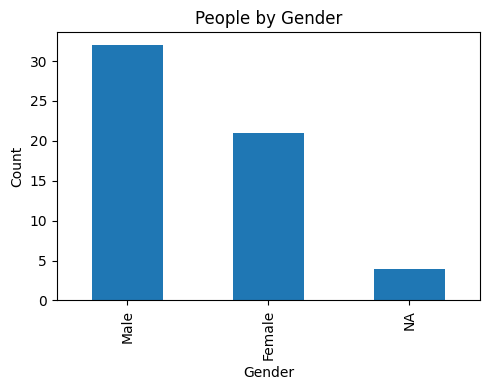

In [24]:
plt.figure(figsize=(5,4))
people["gender"].value_counts().plot(kind="bar")
plt.title("People by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

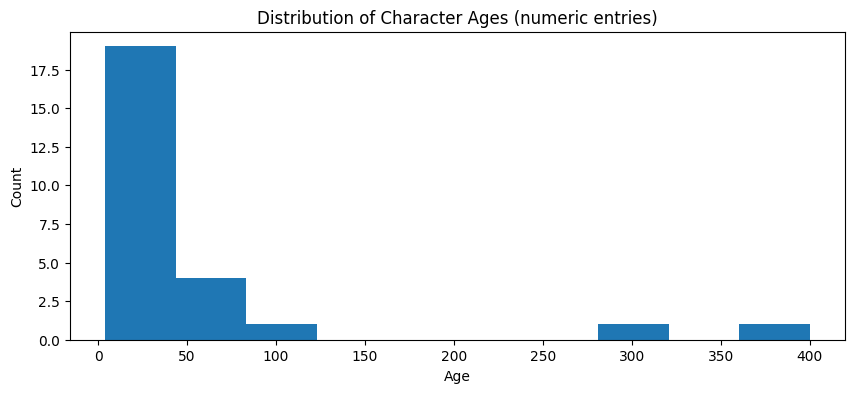

In [27]:
plt.figure(figsize=(10,4))
people["age_num"].dropna().plot(kind="hist", bins=10)
plt.title("Distribution of Character Ages (numeric entries)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

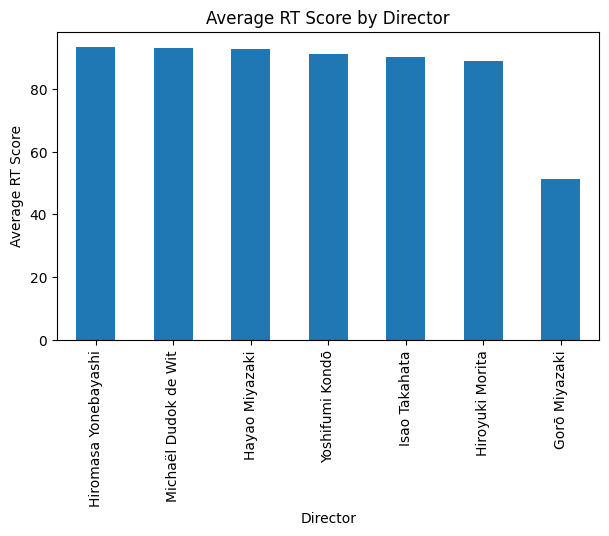

In [33]:
avg_by_director = (
    films.groupby("director")["rt_score_num"]
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(7,4))
avg_by_director.plot(kind="bar")
plt.title("Average RT Score by Director")
plt.xlabel("Director")
plt.ylabel("Average RT Score")
plt.show()